In [1]:
import cv2
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [2]:
v = 'v9'

In [3]:
DATETIME_FORMAT = '%Y/%m/%d %H:%M:%S.%f'

In [4]:
def to_datetime(df, col, format=DATETIME_FORMAT, inplace=False):
    if not inplace:
        df = df.copy()
    df[col] = pd.to_datetime(df[col], format=format)
    if not inplace:
        return df

In [5]:
def calc_datetime(start, end=None, format=DATETIME_FORMAT, decimals=2,
                  utc=True, to_ms=False):
    if end is None:
        end = get_timestamp(utc=utc)
    elif isinstance(end, str):
        end = datetime.strptime(end, format)
    if isinstance(start, str):
        start = datetime.strptime(start, format)
    diff = (end - start).total_seconds()
    if to_ms:
        diff *= 1e3
    return round(diff, decimals)

# Only Jetson

In [6]:
scheme1 = 'scenario-1'

In [7]:
jetson_data_sc1 = pd.read_csv(f'{v}/{scheme1}/log_MyJetsonSc1.csv').drop(0).reset_index(drop=True)

## Jetson

In [8]:
jetson_data_sc1

,asctime,name,topic from,topic to,frame,offset received,frame delay,msg creation delay,consume time,size data received,process time,size data sent,send time,offset sent
0,2022/06/27 03:54:59.257,MyJetsonSc1,None,NaN,NaN,-1,-1,0.06,6.37,921.73,226.07,131.49,2.03,NaN
1,2022/06/27 03:54:59.384,MyJetsonSc1,None,NaN,NaN,-1,-1,0.05,13.67,921.73,99.87,129.91,1.90,NaN
2,2022/06/27 03:54:59.517,MyJetsonSc1,None,NaN,NaN,-1,-1,0.06,59.91,921.73,104.07,130.59,1.99,NaN
3,2022/06/27 03:54:59.645,MyJetsonSc1,None,NaN,NaN,-1,-1,0.06,68.68,921.73,94.32,132.10,1.97,NaN
4,2022/06/27 03:54:59.757,MyJetsonSc1,None,NaN,NaN,-1,-1,0.06,49.13,921.73,82.85,132.41,1.90,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,2022/06/27 03:55:59.382,MyJetsonSc1,None,NaN,NaN,-1,-1,0.05,60.61,921.73,84.12,124.03,1.91,NaN
524,2022/06/27 03:55:59.493,MyJetsonSc1,None,NaN,NaN,-1,-1,0.06,57.65,921.73,82.76,122.07,1.84,NaN
525,2022/06/27 03:55:59.602,MyJetsonSc1,None,NaN,NaN,-1,-1,0.05,56.82,921.73,79.67,122.43,1.99,NaN
526,2022/06/27 03:55:59.712,MyJetsonSc1,None,NaN,NaN,-1,-1,0.06,61.68,921.73,82.45,121.73,1.87,NaN


In [9]:
jetson_data_sc1.describe().round(2)

,offset received,frame delay,msg creation delay,consume time,size data received,process time,size data sent,send time
count,528.0,528.0,528.00,528.00,528.00,528.00,528.00,528.00
mean,-1.0,-1.0,0.06,51.54,921.73,86.24,127.81,1.93
std,0.0,0.0,0.01,11.64,0.00,7.12,3.64,0.14
min,-1.0,-1.0,0.05,6.37,921.73,79.39,112.83,0.23
25%,-1.0,-1.0,0.06,42.04,921.73,83.66,125.66,1.89
50%,-1.0,-1.0,0.06,57.10,921.73,85.97,127.65,1.92
75%,-1.0,-1.0,0.06,60.72,921.73,87.68,130.75,1.96
max,-1.0,-1.0,0.15,69.12,921.73,226.07,134.79,3.44


In [10]:
_df_sc1_jetson = jetson_data_sc1.sample(n=10).reset_index(drop=True)
_df_sc1_jetson = _df_sc1_jetson[['msg creation delay',
                                 'consume time', 'size data received', 'process time',
                                 'size data sent', 'send time']]
_df_sc1_jetson = _df_sc1_jetson.round(2)
_df_sc1_jetson

,msg creation delay,consume time,size data received,process time,size data sent,send time
0,0.06,58.01,921.73,85.36,130.93,3.44
1,0.06,44.94,921.73,86.11,123.77,1.89
2,0.06,36.94,921.73,82.94,129.99,1.92
3,0.05,29.37,921.73,83.21,120.63,1.88
4,0.06,65.37,921.73,93.04,128.80,1.91
5,0.15,39.96,921.73,83.34,125.62,1.93
6,0.05,38.58,921.73,86.80,132.19,1.99
7,0.06,56.19,921.73,82.39,132.06,1.91
8,0.06,57.30,921.73,87.92,123.44,1.85
9,0.06,61.16,921.73,85.57,127.69,1.86


In [11]:
_p = round(12/(len(_df_sc1_jetson.columns)+1),1)
_f = f'|p{{{_p}cm}}'
print()
print(_df_sc1_jetson.round(2).to_latex(column_format=_f*(len(_df_sc1_jetson.columns) + 1) + '|'))


\begin{tabular}{|p{1.7cm}|p{1.7cm}|p{1.7cm}|p{1.7cm}|p{1.7cm}|p{1.7cm}|p{1.7cm}|}
\toprule
{} &  msg creation delay &  consume time &  size data received &  process time &  size data sent &  send time \\
\midrule
0 &                0.06 &         58.01 &              921.73 &         85.36 &          130.93 &       3.44 \\
1 &                0.06 &         44.94 &              921.73 &         86.11 &          123.77 &       1.89 \\
2 &                0.06 &         36.94 &              921.73 &         82.94 &          129.99 &       1.92 \\
3 &                0.05 &         29.37 &              921.73 &         83.21 &          120.63 &       1.88 \\
4 &                0.06 &         65.37 &              921.73 &         93.04 &          128.80 &       1.91 \\
5 &                0.15 &         39.96 &              921.73 &         83.34 &          125.62 &       1.93 \\
6 &                0.05 &         38.58 &              921.73 &         86.80 &          132.19 &       1.99 \\
7 

## Framerate

In [12]:
a_sc1 = jetson_data_sc1['asctime']
experiment_time_sc1 = calc_datetime(a_sc1[0], a_sc1.iloc[-1])
framerate_sc1 = len(jetson_data_sc1)/experiment_time_sc1
print(f'Framerate for scenario 1 is: {framerate_sc1} FPS')

Framerate for scenario 1 is: 8.71718672610203 FPS


## Delay

In [13]:
delay_sc1_lst = []
data_delay_sc1 = jetson_data_sc1['asctime']
for i in range(len(jetson_data_sc1) - 1):
    delta = calc_datetime(data_delay_sc1.iloc[i], data_delay_sc1.iloc[i + 1], to_ms=True)
    delay_sc1_lst.append(delta)
delay_sc1 = round(np.mean(delay_sc1_lst),2)
print(f'Delay for scenario 1 is: {delay_sc1} ms')

Delay for scenario 1 is: 114.94 ms


# Jetson Kafka

In [14]:
scheme2 = 'scenario-2'

In [15]:
input_data_sc2 = pd.read_csv(f'{v}/{scheme2}/log_MyFrameProducerSc2_4.csv').drop(0).reset_index(drop=True)
jetson_data_sc2 = pd.read_csv(f'{v}/{scheme2}/log_MyJetsonSc2.csv').drop(0).reset_index(drop=True)

In [16]:
input_data_sc2

,asctime,name,topic from,topic to,frame,offset received,frame delay,msg creation delay,consume time,size data received,process time,size data sent,send time,offset sent
0,2022/06/27 10:49:34.099,MyFrameProducerSc2_4,None,input,2,-1,-1,9.00,43.05,921.74,0.02,921.76,224.20,4922
1,2022/06/27 10:49:34.174,MyFrameProducerSc2_4,None,input,3,-1,-1,3.63,17.91,921.74,0.01,921.76,290.58,4924
2,2022/06/27 10:49:34.263,MyFrameProducerSc2_4,None,input,4,-1,-1,0.03,27.44,921.74,0.01,921.76,250.05,4926
3,2022/06/27 10:49:34.310,MyFrameProducerSc2_4,None,input,5,-1,-1,0.02,34.65,921.74,0.01,921.76,176.24,4928
4,2022/06/27 10:49:34.406,MyFrameProducerSc2_4,None,input,6,-1,-1,0.01,15.34,921.74,0.01,921.76,217.39,4929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,2022/06/27 10:50:33.211,MyFrameProducerSc2_4,None,input,1779,-1,-1,0.02,65.86,921.74,0.02,921.76,228.87,6061
1167,2022/06/27 10:50:33.312,MyFrameProducerSc2_4,None,input,1780,-1,-1,0.02,54.68,921.74,0.01,921.76,239.41,6063
1168,2022/06/27 10:50:33.590,MyFrameProducerSc2_4,None,input,1781,-1,-1,0.02,71.04,921.74,0.01,921.76,457.89,6065
1169,2022/06/27 10:50:34.028,MyFrameProducerSc2_4,None,input,1782,-1,-1,0.02,45.68,921.74,0.01,921.76,781.32,6067


In [17]:
input_data_sc2.describe().round(2)

,frame,offset received,frame delay,msg creation delay,consume time,size data received,process time,size data sent,send time,offset sent
count,1171.00,1171.0,1171.0,1171.00,1171.00,1171.00,1171.00,1171.00,1171.00,1171.00
mean,890.15,-1.0,-1.0,0.35,44.69,920.95,0.03,920.97,286.24,5503.01
std,621.92,0.0,0.0,3.31,18.30,26.93,0.25,26.93,157.97,338.21
min,2.00,-1.0,-1.0,0.01,0.61,0.14,0.01,0.12,84.77,4917.00
25%,294.50,-1.0,-1.0,0.01,31.61,921.74,0.01,921.76,217.87,5210.50
50%,587.00,-1.0,-1.0,0.02,46.06,921.74,0.01,921.76,244.47,5503.00
75%,1490.50,-1.0,-1.0,0.02,59.12,921.74,0.01,921.76,282.62,5795.50
max,1783.00,-1.0,-1.0,85.27,196.59,921.74,5.05,921.76,1150.05,6089.00


## jetson

In [18]:
jetson_data_sc2

,asctime,name,topic from,topic to,frame,offset received,frame delay,msg creation delay,consume time,size data received,process time,size data sent,send time,offset sent
0,2022/06/27 03:47:56.620,MyJetsonSc2,input,final_cam_1,3,3706,222.86,223.18,100.71,921.73,128.15,123.64,47.53,1878
1,2022/06/27 03:47:56.828,MyJetsonSc2,input,final_cam_1,5,3708,250.97,251.15,81.85,921.73,141.75,124.11,92.98,1879
2,2022/06/27 03:47:56.923,MyJetsonSc2,input,final_cam_1,7,3710,288.60,288.71,61.26,921.73,119.80,124.40,46.72,1880
3,2022/06/27 03:47:57.097,MyJetsonSc2,input,final_cam_1,8,3711,369.97,370.23,137.01,921.73,158.56,122.92,39.59,1881
4,2022/06/27 03:47:57.200,MyJetsonSc2,input,final_cam_1,10,3713,432.97,433.50,60.07,921.73,97.03,124.29,25.00,1882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,2022/06/27 03:50:36.191,MyJetsonSc2,input,final_cam_2,570,6064,2953.70,2862.12,65.55,921.73,138.62,86.76,45.49,195
929,2022/06/27 03:50:36.335,MyJetsonSc2,input,final_cam_2,571,6066,3011.85,2891.64,64.08,921.73,131.47,86.16,38.10,196
930,2022/06/27 03:50:36.489,MyJetsonSc2,input,final_cam_2,572,6068,3031.86,2965.77,64.54,921.73,132.40,88.22,40.05,197
931,2022/06/27 03:50:36.646,MyJetsonSc2,input,final_cam_1,1783,6070,3128.97,2848.12,64.08,921.73,131.07,125.12,45.65,2611


In [19]:
jetson_data_sc2['total delay'] = jetson_data_sc2['frame delay'] + \
                                 jetson_data_sc2['process time'] + \
                                 jetson_data_sc2['send time']

In [20]:
jetson_data_sc2[['frame delay','consume time', 'process time', 'send time', 'total delay']].describe().round()

,frame delay,consume time,process time,send time,total delay
count,933.0,933.0,933.0,933.0,933.0
mean,2069.0,111.0,126.0,52.0,2247.0
std,1102.0,741.0,13.0,33.0,1101.0
min,116.0,56.0,78.0,16.0,357.0
25%,1169.0,71.0,119.0,39.0,1353.0
50%,1981.0,81.0,126.0,44.0,2165.0
75%,2872.0,96.0,131.0,52.0,3054.0
max,4840.0,22701.0,184.0,486.0,5011.0


## Framerate

In [21]:
a_sc2 = jetson_data_sc2['asctime']
experiment_time_sc2 = calc_datetime(a_sc2.iloc[0], a_sc2.iloc[-1])
framerate_sc2 = len(jetson_data_sc2)/experiment_time_sc2
print(f'Framerate for scenario 2 is: {framerate_sc2} FPS')

Framerate for scenario 2 is: 5.8254245754245755 FPS


## Delay

In [22]:
jetson_data_sc2

,asctime,name,topic from,topic to,frame,offset received,frame delay,msg creation delay,consume time,size data received,process time,size data sent,send time,offset sent,total delay
0,2022/06/27 03:47:56.620,MyJetsonSc2,input,final_cam_1,3,3706,222.86,223.18,100.71,921.73,128.15,123.64,47.53,1878,398.54
1,2022/06/27 03:47:56.828,MyJetsonSc2,input,final_cam_1,5,3708,250.97,251.15,81.85,921.73,141.75,124.11,92.98,1879,485.70
2,2022/06/27 03:47:56.923,MyJetsonSc2,input,final_cam_1,7,3710,288.60,288.71,61.26,921.73,119.80,124.40,46.72,1880,455.12
3,2022/06/27 03:47:57.097,MyJetsonSc2,input,final_cam_1,8,3711,369.97,370.23,137.01,921.73,158.56,122.92,39.59,1881,568.12
4,2022/06/27 03:47:57.200,MyJetsonSc2,input,final_cam_1,10,3713,432.97,433.50,60.07,921.73,97.03,124.29,25.00,1882,555.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,2022/06/27 03:50:36.191,MyJetsonSc2,input,final_cam_2,570,6064,2953.70,2862.12,65.55,921.73,138.62,86.76,45.49,195,3137.81
929,2022/06/27 03:50:36.335,MyJetsonSc2,input,final_cam_2,571,6066,3011.85,2891.64,64.08,921.73,131.47,86.16,38.10,196,3181.42
930,2022/06/27 03:50:36.489,MyJetsonSc2,input,final_cam_2,572,6068,3031.86,2965.77,64.54,921.73,132.40,88.22,40.05,197,3204.31
931,2022/06/27 03:50:36.646,MyJetsonSc2,input,final_cam_1,1783,6070,3128.97,2848.12,64.08,921.73,131.07,125.12,45.65,2611,3305.69


In [23]:
delay_sc2 = jetson_data_sc2['total delay'].mean()
print(f'Delay for scenario 2 is: {delay_sc2} ms')

Delay for scenario 2 is: 2246.970578778133 ms


# Worker Cloud + Kafka Cloud

In [24]:
scheme3 = 'scenario-3'

In [25]:
input_data_sc3 = pd.read_csv(f'{v}/{scheme3}/log_MyFrameProducerSc3.csv').drop(0).reset_index(drop=True)
cloud_data_sc3 = pd.read_csv(f'{v}/{scheme3}/log_MyCloudSc3.csv').drop(0).reset_index(drop=True)

In [26]:
input_data_sc3

,asctime,name,topic from,topic to,frame,offset received,frame delay,msg creation delay,consume time,size data received,process time,size data sent,send time,offset sent
0,2022/06/27 11:41:15.486,MyFrameProducerSc3,None,input,2,-1,-1,10.32,37.49,921.74,0.01,921.76,3054.09,185
1,2022/06/27 11:41:16.943,MyFrameProducerSc3,None,input,3,-1,-1,23.14,26.40,921.74,0.01,921.76,4480.58,187
2,2022/06/27 11:41:18.144,MyFrameProducerSc3,None,input,4,-1,-1,0.01,43.74,921.74,0.01,921.76,4174.37,189
3,2022/06/27 11:41:19.564,MyFrameProducerSc3,None,input,5,-1,-1,0.01,45.84,921.74,0.01,921.76,4065.75,191
4,2022/06/27 11:41:20.659,MyFrameProducerSc3,None,input,6,-1,-1,0.02,33.81,921.74,0.02,921.76,3693.92,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,2022/06/27 11:43:00.375,MyFrameProducerSc3,None,input,255,-1,-1,0.01,59.84,921.74,0.01,921.76,3944.26,325
149,2022/06/27 11:43:01.809,MyFrameProducerSc3,None,input,256,-1,-1,0.02,65.78,921.74,0.01,921.76,4028.42,327
150,2022/06/27 11:43:03.307,MyFrameProducerSc3,None,input,257,-1,-1,0.02,59.94,921.74,0.01,921.76,4225.66,329
151,2022/06/27 11:43:05.002,MyFrameProducerSc3,None,input,258,-1,-1,0.02,59.68,921.74,0.01,921.76,4615.03,331


In [27]:
_df_sc3 = input_data_sc3[['msg creation delay','consume time','size data received','process time','size data sent','send time']].describe()
_df_sc3.round(2)

,msg creation delay,consume time,size data received,process time,size data sent,send time
count,153.00,153.00,153.00,153.00,153.00,153.00
mean,0.24,50.47,921.74,0.02,921.76,4446.76
std,2.04,15.87,0.00,0.07,0.00,522.98
min,0.01,22.83,921.74,0.01,921.76,2431.29
25%,0.01,39.59,921.74,0.01,921.76,4174.37
50%,0.02,54.63,921.74,0.01,921.76,4470.39
75%,0.02,59.68,921.74,0.01,921.76,4707.43
max,23.14,177.37,921.74,0.77,921.76,6376.12


In [28]:
_p = round(12/(len(_df_sc3.columns)+1),1)
_f = f'|p{{{_p}cm}}'
print()
print(_df_sc3.round(2).to_latex(column_format=_f*(len(_df_sc3.columns) + 1) + '|'))


\begin{tabular}{|p{1.7cm}|p{1.7cm}|p{1.7cm}|p{1.7cm}|p{1.7cm}|p{1.7cm}|p{1.7cm}|}
\toprule
{} &  msg creation delay &  consume time &  size data received &  process time &  size data sent &  send time \\
\midrule
count &              153.00 &        153.00 &              153.00 &        153.00 &          153.00 &     153.00 \\
mean  &                0.24 &         50.47 &              921.74 &          0.02 &          921.76 &    4446.76 \\
std   &                2.04 &         15.87 &                0.00 &          0.07 &            0.00 &     522.98 \\
min   &                0.01 &         22.83 &              921.74 &          0.01 &          921.76 &    2431.29 \\
25\%   &                0.01 &         39.59 &              921.74 &          0.01 &          921.76 &    4174.37 \\
50\%   &                0.02 &         54.63 &              921.74 &          0.01 &          921.76 &    4470.39 \\
75\%   &                0.02 &         59.68 &              921.74 &          0.01 &    

## cloud

In [29]:
cloud_data_sc3

,asctime,name,topic from,topic to,frame,offset received,frame delay,msg creation delay,consume time,size data received,process time,size data sent,send time,offset sent
0,2022/06/27 04:38:58.197,MyCloudSc3,input,final_cam_1,2,1,1401.53,1402.08,683.94,921.74,119.99,44.79,6.71,1
1,2022/06/27 04:38:58.916,MyCloudSc3,input,final_cam_1,3,2,2068.71,1404.01,701.35,921.74,123.02,44.87,20.18,2
2,2022/06/27 04:38:59.613,MyCloudSc3,input,final_cam_1,4,3,2095.17,1397.72,698.88,921.74,132.96,132.43,7.58,3
3,2022/06/27 04:39:00.285,MyCloudSc3,input,final_cam_1,5,4,2077.63,1395.12,688.50,921.74,111.24,120.17,11.35,4
4,2022/06/27 04:39:00.988,MyCloudSc3,input,final_cam_1,6,5,2085.97,1387.02,695.67,921.74,121.63,117.79,6.82,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,2022/06/27 04:43:05.164,MyCloudSc3,input,final_cam_1,258,331,4639.12,3208.94,1091.63,921.74,121.72,140.53,9.49,257
331,2022/06/27 04:43:05.410,MyCloudSc3,input,final_cam_2,75,332,4357.47,2615.79,248.87,921.74,118.95,88.99,9.38,74
332,2022/06/27 04:43:06.536,MyCloudSc3,input,final_cam_1,259,333,4587.72,3089.90,1131.91,921.74,111.21,142.16,9.30,258
333,2022/06/27 04:43:06.963,MyCloudSc3,input,final_cam_2,76,334,4179.61,2921.59,435.51,921.74,104.19,88.38,7.82,75


In [30]:
cloud_data_sc3.describe()

,frame,offset received,frame delay,msg creation delay,consume time,size data received,process time,size data sent,send time,offset sent
count,335.000000,335.0000,335.000000,335.000000,335.000000,3.350000e+02,335.000000,335.000000,335.000000,335.000000
mean,109.468657,168.0000,3242.991254,2176.580716,747.192806,9.217400e+02,119.788597,123.648955,9.498000,108.468657
std,76.714523,96.8504,1177.778718,799.173324,249.650337,4.326562e-12,6.597437,22.850033,3.001248,76.714523
min,1.000000,1.0000,1401.530000,1369.720000,10.120000,9.217400e+02,104.190000,44.790000,5.110000,0.000000
25%,43.000000,84.5000,2241.685000,1499.245000,692.105000,9.217400e+02,114.160000,124.520000,7.325000,42.000000
50%,92.000000,168.0000,2269.190000,1525.590000,744.540000,9.217400e+02,121.440000,135.360000,9.550000,91.000000
75%,175.500000,251.5000,4457.090000,2964.500000,776.115000,9.217400e+02,124.240000,137.480000,10.455000,174.500000
max,259.000000,335.0000,6581.890000,5015.990000,1547.110000,9.217400e+02,145.710000,142.460000,33.870000,258.000000


In [31]:
_df_sc3_cloud = cloud_data_sc3[['frame delay','consume time','size data received','process time','size data sent','send time']].describe()
_df_sc3_cloud.round(2)

,frame delay,consume time,size data received,process time,size data sent,send time
count,335.00,335.00,335.00,335.00,335.00,335.00
mean,3242.99,747.19,921.74,119.79,123.65,9.50
std,1177.78,249.65,0.00,6.60,22.85,3.00
min,1401.53,10.12,921.74,104.19,44.79,5.11
25%,2241.68,692.10,921.74,114.16,124.52,7.32
50%,2269.19,744.54,921.74,121.44,135.36,9.55
75%,4457.09,776.12,921.74,124.24,137.48,10.46
max,6581.89,1547.11,921.74,145.71,142.46,33.87


In [32]:
_p = round(12/(len(_df_sc3_cloud.columns)+1),1)
_f = f'|p{{{_p}cm}}'
print()
print(_df_sc3_cloud.round(2).to_latex(column_format=_f*(len(_df_sc3_cloud.columns) + 1) + '|'))


\begin{tabular}{|p{1.7cm}|p{1.7cm}|p{1.7cm}|p{1.7cm}|p{1.7cm}|p{1.7cm}|p{1.7cm}|}
\toprule
{} &  frame delay &  consume time &  size data received &  process time &  size data sent &  send time \\
\midrule
count &       335.00 &        335.00 &              335.00 &        335.00 &          335.00 &     335.00 \\
mean  &      3242.99 &        747.19 &              921.74 &        119.79 &          123.65 &       9.50 \\
std   &      1177.78 &        249.65 &                0.00 &          6.60 &           22.85 &       3.00 \\
min   &      1401.53 &         10.12 &              921.74 &        104.19 &           44.79 &       5.11 \\
25\%   &      2241.68 &        692.10 &              921.74 &        114.16 &          124.52 &       7.32 \\
50\%   &      2269.19 &        744.54 &              921.74 &        121.44 &          135.36 &       9.55 \\
75\%   &      4457.09 &        776.12 &              921.74 &        124.24 &          137.48 &      10.46 \\
max   &      6581.89 &     

## Framerate

In [33]:
a_sc3 = cloud_data_sc3['asctime']
experiment_time_sc3 = calc_datetime(a_sc3.iloc[0], a_sc3.iloc[-1])
framerate_sc3 = len(cloud_data_sc3)/experiment_time_sc3
print(f'Framerate for scenario 2 is: {framerate_sc3} FPS')

Framerate for scenario 2 is: 1.3397856342985124 FPS


## Delay

In [34]:
cloud_data_sc3['total delay'] = cloud_data_sc3['frame delay'] + \
                                cloud_data_sc3['process time'] + \
                                cloud_data_sc3['send time']

In [35]:
cloud_data_sc3

,asctime,name,topic from,topic to,frame,offset received,frame delay,msg creation delay,consume time,size data received,process time,size data sent,send time,offset sent,total delay
0,2022/06/27 04:38:58.197,MyCloudSc3,input,final_cam_1,2,1,1401.53,1402.08,683.94,921.74,119.99,44.79,6.71,1,1528.23
1,2022/06/27 04:38:58.916,MyCloudSc3,input,final_cam_1,3,2,2068.71,1404.01,701.35,921.74,123.02,44.87,20.18,2,2211.91
2,2022/06/27 04:38:59.613,MyCloudSc3,input,final_cam_1,4,3,2095.17,1397.72,698.88,921.74,132.96,132.43,7.58,3,2235.71
3,2022/06/27 04:39:00.285,MyCloudSc3,input,final_cam_1,5,4,2077.63,1395.12,688.50,921.74,111.24,120.17,11.35,4,2200.22
4,2022/06/27 04:39:00.988,MyCloudSc3,input,final_cam_1,6,5,2085.97,1387.02,695.67,921.74,121.63,117.79,6.82,5,2214.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,2022/06/27 04:43:05.164,MyCloudSc3,input,final_cam_1,258,331,4639.12,3208.94,1091.63,921.74,121.72,140.53,9.49,257,4770.33
331,2022/06/27 04:43:05.410,MyCloudSc3,input,final_cam_2,75,332,4357.47,2615.79,248.87,921.74,118.95,88.99,9.38,74,4485.80
332,2022/06/27 04:43:06.536,MyCloudSc3,input,final_cam_1,259,333,4587.72,3089.90,1131.91,921.74,111.21,142.16,9.30,258,4708.23
333,2022/06/27 04:43:06.963,MyCloudSc3,input,final_cam_2,76,334,4179.61,2921.59,435.51,921.74,104.19,88.38,7.82,75,4291.62


In [36]:
delay_sc3 = cloud_data_sc3['total delay'].mean()
print(f'Delay for scenario 2 is: {delay_sc3} ms')

Delay for scenario 2 is: 3372.277850746268 ms


# Fog Cloud

In [37]:
scheme4 = 'scenario-4'

In [38]:
input_data_sc4 = pd.read_csv(f'{v}/{scheme4}/log_MyFrameProducerSc2_4.csv').drop(0).reset_index(drop=True)
preprocess_data_sc4 = pd.read_csv(f'{v}/{scheme4}/log_MyPreprocess.csv').drop(0).reset_index(drop=True)
cloud_data_sc4 = pd.read_csv(f'{v}/{scheme4}/log_MyCloudSc4.csv').drop(0).reset_index(drop=True)
jetson_data_sc4 = pd.read_csv(f'{v}/{scheme4}/log_MyJetsonSc4.csv').drop(0).reset_index(drop=True)
forwarder_data_sc4 = pd.read_csv(f'{v}/{scheme4}/log_MyForwarder.csv').drop(0).reset_index(drop=True)
merger_data_sc4 = pd.read_csv(f'{v}/{scheme4}/log_MyMerger.csv')

merger_data_sc4 = merger_data_sc4[merger_data_sc4['frame'] != 1] # the first frame is an outlier

## Merger

In [39]:
merger_data_sc4

,asctime,name,topic from,topic to,frame,offset received,frame delay,msg creation delay,consume time,size data received,process time,size data sent,send time,offset sent
0,2022/06/14 05:54:35.257,MyMerger,input,final_cam_1,2,12854,80.76,82.64,728117.77,921.74,0.02,921.76,48.49,4350
2,2022/06/14 05:54:35.391,MyMerger,input,final_cam_1,5,12855,60.36,61.04,86.54,921.74,0.01,921.76,51.89,4352
3,2022/06/14 05:54:35.440,MyMerger,input,final_cam_1,3,12486,193.75,194.23,18.24,921.74,0.01,921.76,77.25,4353
4,2022/06/14 05:54:35.465,MyMerger,input,final_cam_1,6,12856,98.59,98.67,61.61,921.74,0.01,921.76,35.30,4354
5,2022/06/14 05:54:35.532,MyMerger,input,final_cam_1,4,12487,288.26,288.30,75.10,921.74,0.01,921.76,21.28,4355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3324,2022/06/14 05:57:05.709,MyMerger,result,final_cam_1,2538,2399,1037.44,522.92,2.89,361.12,0.01,361.17,83.10,7674
3325,2022/06/14 05:57:05.726,MyMerger,input,final_cam_1,2538,13721,1116.47,1116.95,51.87,921.74,0.01,921.76,21.99,7675
3326,2022/06/14 05:57:05.867,MyMerger,result,final_cam_1,2518,2400,2385.05,274.58,155.33,0.13,0.01,0.32,4.60,7676
3327,2022/06/14 05:57:07.129,MyMerger,result,final_cam_1,2537,2401,2053.89,6.25,705.81,0.13,0.01,0.32,556.36,7677


## Merger Data from Jetson

In [40]:
from_result = merger_data_sc4['topic from'] == 'result'
bt_200 = merger_data_sc4['size data received'] > 200
merger_data_sc4_jetson = (merger_data_sc4[from_result & bt_200]).copy()
merger_data_sc4_jetson

,asctime,name,topic from,topic to,frame,offset received,frame delay,msg creation delay,consume time,size data received,process time,size data sent,send time,offset sent
205,2022/06/14 05:54:45.349,MyMerger,result,final_cam_1,164,1009,1109.27,137.14,0.34,360.80,0.02,360.85,45.23,4555
210,2022/06/14 05:54:45.581,MyMerger,result,final_cam_1,166,1010,1228.60,168.20,0.32,361.06,0.02,361.11,54.48,4560
213,2022/06/14 05:54:45.660,MyMerger,result,final_cam_1,168,1012,1180.02,89.76,0.31,360.85,0.01,360.90,72.42,4563
216,2022/06/14 05:54:45.842,MyMerger,result,final_cam_1,170,1013,1238.18,117.84,45.27,361.15,0.01,361.20,83.60,4566
221,2022/06/14 05:54:46.006,MyMerger,result,final_cam_1,173,1015,1234.38,131.49,0.81,360.69,0.01,360.74,89.39,4571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3313,2022/06/14 05:57:04.803,MyMerger,result,final_cam_1,2528,2394,702.75,148.86,15.19,360.87,0.01,360.92,68.99,7663
3318,2022/06/14 05:57:05.467,MyMerger,result,final_cam_1,2531,2396,708.41,187.91,0.36,360.80,0.02,360.85,567.04,7668
3321,2022/06/14 05:57:05.608,MyMerger,result,final_cam_1,2532,2397,1300.38,693.62,10.98,360.86,0.01,360.90,62.92,7671
3322,2022/06/14 05:57:05.627,MyMerger,result,final_cam_1,2534,2398,1192.90,566.43,0.28,360.99,0.01,361.04,79.13,7672


In [41]:
_df_sc4_jetson = merger_data_sc4_jetson.sample(n=10).reset_index(drop=True)
_df_sc4_jetson = _df_sc4_jetson[['frame delay',
                                 'consume time', 'size data received', 'process time',
                                 'size data sent', 'send time']]
_df_sc4_jetson = _df_sc4_jetson.round(2)
_df_sc4_jetson

,frame delay,consume time,size data received,process time,size data sent,send time
0,1082.50,0.35,361.08,0.02,361.13,39.23
1,1648.11,23.81,361.00,0.01,361.05,50.90
2,1510.45,0.28,360.81,0.01,360.86,36.77
3,1797.77,7.94,361.17,0.07,361.22,200.08
4,1783.83,0.38,360.96,0.01,361.01,66.78
5,1408.65,18.00,361.16,0.01,361.21,62.32
6,818.10,0.35,360.88,0.01,360.93,53.58
7,1444.75,0.35,360.90,0.01,360.95,157.60
8,1649.88,0.34,361.18,0.01,361.23,84.04
9,1353.16,0.29,361.26,0.01,361.31,65.49


In [42]:
_p = round(12/(len(_df_sc4_jetson.columns)+1),1)
_f = f'|p{{{_p}cm}}'
print()
print(_df_sc4_jetson.round(2).to_latex(column_format=_f*(len(_df_sc4_jetson.columns) + 1) + '|'))


\begin{tabular}{|p{1.7cm}|p{1.7cm}|p{1.7cm}|p{1.7cm}|p{1.7cm}|p{1.7cm}|p{1.7cm}|}
\toprule
{} &  frame delay &  consume time &  size data received &  process time &  size data sent &  send time \\
\midrule
0 &      1082.50 &          0.35 &              361.08 &          0.02 &          361.13 &      39.23 \\
1 &      1648.11 &         23.81 &              361.00 &          0.01 &          361.05 &      50.90 \\
2 &      1510.45 &          0.28 &              360.81 &          0.01 &          360.86 &      36.77 \\
3 &      1797.77 &          7.94 &              361.17 &          0.07 &          361.22 &     200.08 \\
4 &      1783.83 &          0.38 &              360.96 &          0.01 &          361.01 &      66.78 \\
5 &      1408.65 &         18.00 &              361.16 &          0.01 &          361.21 &      62.32 \\
6 &       818.10 &          0.35 &              360.88 &          0.01 &          360.93 &      53.58 \\
7 &      1444.75 &          0.35 &              360.90 &  

## Merger Data from Cloud

In [43]:
lt_200 = merger_data_sc4['size data received'] < 200
merger_data_sc4_cloud = (merger_data_sc4[from_result & lt_200]).copy()
merger_data_sc4_cloud

,asctime,name,topic from,topic to,frame,offset received,frame delay,msg creation delay,consume time,size data received,process time,size data sent,send time,offset sent
20,2022/06/14 05:54:36.396,MyMerger,result,final_cam_1,2,968,1238.56,91.25,30.65,0.13,0.01,0.32,38.96,4370
21,2022/06/14 05:54:36.403,MyMerger,result,final_cam_1,5,969,1123.66,20.28,22.44,0.13,0.01,0.32,3.96,4371
26,2022/06/14 05:54:36.623,MyMerger,result,final_cam_1,6,970,1246.59,99.64,0.14,0.13,0.01,0.32,46.96,4376
27,2022/06/14 05:54:36.626,MyMerger,result,final_cam_1,10,971,1066.98,50.20,14.20,0.13,0.01,0.32,10.44,4377
29,2022/06/14 05:54:36.768,MyMerger,result,final_cam_1,12,972,1073.83,8.32,46.96,0.13,0.01,0.32,15.42,4379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3290,2022/06/14 05:57:03.751,MyMerger,result,final_cam_1,2487,2386,2000.79,32.22,63.26,0.13,0.01,0.32,24.59,7640
3314,2022/06/14 05:57:04.817,MyMerger,result,final_cam_1,2504,2395,2081.56,94.81,0.08,0.13,0.01,0.32,83.03,7664
3326,2022/06/14 05:57:05.867,MyMerger,result,final_cam_1,2518,2400,2385.05,274.58,155.33,0.13,0.01,0.32,4.60,7676
3327,2022/06/14 05:57:07.129,MyMerger,result,final_cam_1,2537,2401,2053.89,6.25,705.81,0.13,0.01,0.32,556.36,7677


In [44]:
merger_data_sc4_cloud['total delay'] = merger_data_sc4_cloud['frame delay'] + \
                                       merger_data_sc4_cloud['process time'] + \
                                       merger_data_sc4_cloud['send time']

In [45]:
merger_data_sc4_cloud.describe().round(2)

,frame,offset received,frame delay,msg creation delay,consume time,size data received,process time,size data sent,send time,offset sent,total delay
count,411.00,411.00,411.00,411.00,411.00,411.00,411.00,411.00,411.00,411.00,411.00
mean,951.66,1512.12,1447.35,235.66,16.46,0.13,0.02,0.32,62.96,5655.83,1510.34
std,628.22,387.33,575.55,268.48,76.27,0.00,0.18,0.00,50.78,846.93,587.27
min,2.00,968.00,770.52,6.25,0.05,0.13,0.01,0.32,3.96,4370.00,841.66
25%,439.00,1180.50,1091.53,95.36,0.11,0.13,0.01,0.32,39.39,4949.50,1137.53
50%,897.00,1477.00,1177.83,142.69,0.14,0.13,0.01,0.32,54.81,5599.00,1243.77
75%,1326.00,1775.50,1566.46,224.89,16.66,0.13,0.01,0.32,72.56,6209.50,1630.27
max,2539.00,2402.00,3506.27,1573.97,1320.05,0.13,3.58,0.32,556.36,7678.00,3636.40


In [46]:
_df_sc4_cloud = merger_data_sc4_cloud.sample(n=10).reset_index(drop=True)
_df_sc4_cloud = _df_sc4_cloud[['frame delay',
                                 'consume time', 'size data received', 'process time',
                                 'size data sent', 'send time']]
_df_sc4_cloud = _df_sc4_cloud.round(2)
_df_sc4_cloud

,frame delay,consume time,size data received,process time,size data sent,send time
0,1173.45,0.07,0.13,0.01,0.32,36.34
1,1216.75,0.12,0.13,0.01,0.32,44.47
2,2522.46,45.61,0.13,0.01,0.32,74.14
3,1008.86,4.52,0.13,0.02,0.32,47.50
4,1144.24,0.14,0.13,0.02,0.32,48.20
5,1093.68,1.01,0.13,0.01,0.32,59.31
6,1033.44,0.13,0.13,0.01,0.32,55.65
7,1111.61,0.11,0.13,0.01,0.32,68.18
8,929.25,55.20,0.13,0.01,0.32,19.78
9,1170.30,0.11,0.13,0.01,0.32,31.63


In [47]:
_p = round(12/(len(_df_sc4_cloud.columns)+1),1)
_f = f'|p{{{_p}cm}}'
print()
print(_df_sc4_cloud.round(2).to_latex(column_format=_f*(len(_df_sc4_cloud.columns) + 1) + '|'))


\begin{tabular}{|p{1.7cm}|p{1.7cm}|p{1.7cm}|p{1.7cm}|p{1.7cm}|p{1.7cm}|p{1.7cm}|}
\toprule
{} &  frame delay &  consume time &  size data received &  process time &  size data sent &  send time \\
\midrule
0 &      1173.45 &          0.07 &                0.13 &          0.01 &            0.32 &      36.34 \\
1 &      1216.75 &          0.12 &                0.13 &          0.01 &            0.32 &      44.47 \\
2 &      2522.46 &         45.61 &                0.13 &          0.01 &            0.32 &      74.14 \\
3 &      1008.86 &          4.52 &                0.13 &          0.02 &            0.32 &      47.50 \\
4 &      1144.24 &          0.14 &                0.13 &          0.02 &            0.32 &      48.20 \\
5 &      1093.68 &          1.01 &                0.13 &          0.01 &            0.32 &      59.31 \\
6 &      1033.44 &          0.13 &                0.13 &          0.01 &            0.32 &      55.65 \\
7 &      1111.61 &          0.11 &                0.13 &  

## Framerate

In [48]:
asctime_sc4_jetson = merger_data_sc4_jetson['asctime']
experiment_time_sc4_jetson = calc_datetime(asctime_sc4_jetson.iloc[0], asctime_sc4_jetson.iloc[-1])
framerate_sc4_jetson = len(merger_data_sc4_jetson)/experiment_time_sc4_jetson
print(f'Framerate from Jetson in scenario 4 is: {framerate_sc4_jetson} FPS')

Framerate from Jetson in scenario 4 is: 7.288401253918495 FPS


In [49]:
asctime_sc4_cloud = merger_data_sc4_cloud['asctime']
experiment_time_sc4_cloud = calc_datetime(asctime_sc4_cloud.iloc[0], asctime_sc4_cloud.iloc[-1])
framerate_sc4_cloud = len(merger_data_sc4_cloud)/experiment_time_sc4_cloud
print(f'Framerate from Cloud in scenario 4 is: {framerate_sc4_cloud} FPS')

Framerate from Cloud in scenario 4 is: 2.7121552065461265 FPS


In [50]:
framerate_sc4 = framerate_sc4_jetson + framerate_sc4_cloud
print(f'Framerate for scenario 4 is: {framerate_sc4} FPS')

Framerate for scenario 4 is: 10.00055646046462 FPS


## Delay

In [51]:
merger_data_sc4_jetson_cloud = pd.concat([merger_data_sc4_jetson,merger_data_sc4_cloud])\
                                 .reset_index(drop=True)

In [52]:
merger_data_sc4_jetson_cloud['total delay'] = merger_data_sc4_jetson_cloud['frame delay'] + \
                                              merger_data_sc4_jetson_cloud['process time'] + \
                                              merger_data_sc4_jetson_cloud['send time']

In [53]:
merger_data_sc4_jetson_cloud

,asctime,name,topic from,topic to,frame,offset received,frame delay,msg creation delay,consume time,size data received,process time,size data sent,send time,offset sent,total delay
0,2022/06/14 05:54:45.349,MyMerger,result,final_cam_1,164,1009,1109.27,137.14,0.34,360.80,0.02,360.85,45.23,4555,1154.52
1,2022/06/14 05:54:45.581,MyMerger,result,final_cam_1,166,1010,1228.60,168.20,0.32,361.06,0.02,361.11,54.48,4560,1283.10
2,2022/06/14 05:54:45.660,MyMerger,result,final_cam_1,168,1012,1180.02,89.76,0.31,360.85,0.01,360.90,72.42,4563,1252.45
3,2022/06/14 05:54:45.842,MyMerger,result,final_cam_1,170,1013,1238.18,117.84,45.27,361.15,0.01,361.20,83.60,4566,1321.79
4,2022/06/14 05:54:46.006,MyMerger,result,final_cam_1,173,1015,1234.38,131.49,0.81,360.69,0.01,360.74,89.39,4571,1323.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,2022/06/14 05:57:03.751,MyMerger,result,final_cam_1,2487,2386,2000.79,32.22,63.26,0.13,0.01,0.32,24.59,7640,2025.39
1430,2022/06/14 05:57:04.817,MyMerger,result,final_cam_1,2504,2395,2081.56,94.81,0.08,0.13,0.01,0.32,83.03,7664,2164.60
1431,2022/06/14 05:57:05.867,MyMerger,result,final_cam_1,2518,2400,2385.05,274.58,155.33,0.13,0.01,0.32,4.60,7676,2389.66
1432,2022/06/14 05:57:07.129,MyMerger,result,final_cam_1,2537,2401,2053.89,6.25,705.81,0.13,0.01,0.32,556.36,7677,2610.26


In [54]:
delay_sc4 = merger_data_sc4_jetson_cloud['total delay'].mean()
print(f'Delay for scenario 4 is: {delay_sc4} ms')

Delay for scenario 4 is: 1717.2389679218988 ms


# Comparison

In [55]:
compare = pd.DataFrame([
    {'scenario':'Hanya Jetson', 'framerate (FPS)': framerate_sc1, 'delay (ms)': delay_sc1},
    {'scenario':'Jetson dengan Kafka Lokal', 'framerate (FPS)': framerate_sc2, 'delay (ms)': delay_sc2},
    {'scenario':'Worker Cloud dengan Kafka Cloud', 'framerate (FPS)': framerate_sc3, 'delay (ms)': delay_sc3},
    {'scenario':'Kombinasi dari Fog dan Cloud', 'framerate (FPS)': framerate_sc4, 'delay (ms)': delay_sc4},
])
compare.set_index('scenario').round(2)

,framerate (FPS),delay (ms)
scenario,,
Hanya Jetson,8.72,114.94
Jetson dengan Kafka Lokal,5.83,2246.97
Worker Cloud dengan Kafka Cloud,1.34,3372.28
Kombinasi dari Fog dan Cloud,10.00,1717.24


In [56]:
plotting_framerate = pd.DataFrame([
    {'Scenario':'Skenario 1', 'Metrik': 'Framerate', 'Framerate': framerate_sc1},
    {'Scenario':'Skenario 2', 'Metrik': 'Framerate', 'Framerate': framerate_sc2},
    {'Scenario':'Skenario 3', 'Metrik': 'Framerate', 'Framerate': framerate_sc3},
    {'Scenario':'Skenario 4', 'Metrik': 'Framerate', 'Framerate': framerate_sc4},
]).round(2)
plotting_delay = pd.DataFrame([
    {'Scenario':'Skenario 1', 'Metrik': 'Delay', 'Delay': delay_sc1},
    {'Scenario':'Skenario 2', 'Metrik': 'Delay', 'Delay': delay_sc2},
    {'Scenario':'Skenario 3', 'Metrik': 'Delay', 'Delay': delay_sc3},
    {'Scenario':'Skenario 4', 'Metrik': 'Delay', 'Delay': delay_sc4},
]).round(2)

In [57]:
plotting_framerate

,Scenario,Metrik,Framerate
0,Skenario 1,Framerate,8.72
1,Skenario 2,Framerate,5.83
2,Skenario 3,Framerate,1.34
3,Skenario 4,Framerate,10.00


In [58]:
plotting_delay

,Scenario,Metrik,Delay
0,Skenario 1,Delay,114.94
1,Skenario 2,Delay,2246.97
2,Skenario 3,Delay,3372.28
3,Skenario 4,Delay,1717.24


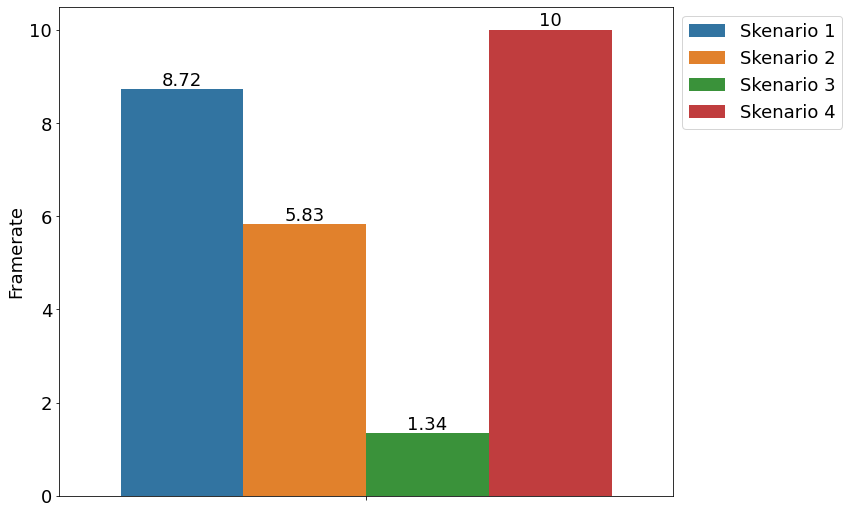

In [59]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(11,9))
ax_framerate = sns.barplot(data=plotting_framerate, x='Metrik', y='Framerate', hue='Scenario')
ax_framerate.set(xticklabels=[])
ax_framerate.set(xlabel=None)
# ax_framerate.set(title='Perbandingan Metrik Framerate (FPS) untuk Keempat Skenario\n(Lebih Tinggi Lebih Baik)')
for i in ax_framerate.containers:
    ax_framerate.bar_label(i,)
ax_framerate.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

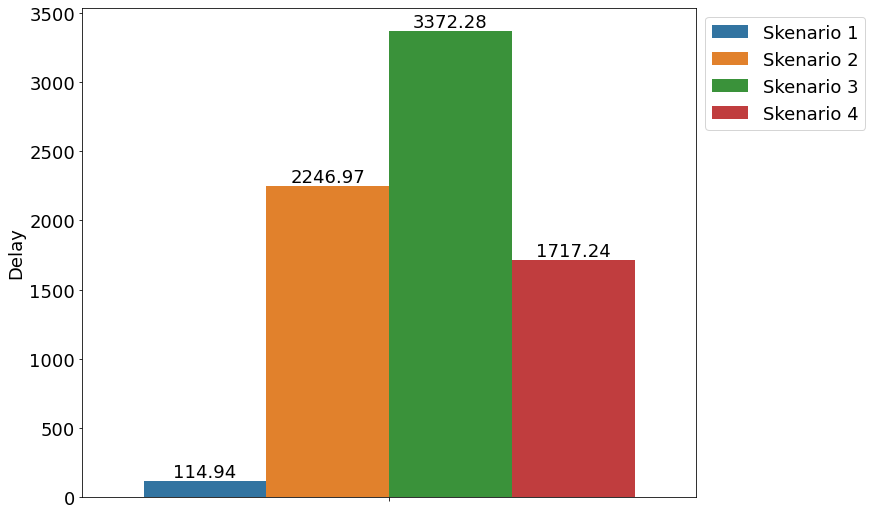

In [60]:
plt.figure(figsize=(11,9))
ax_delay = sns.barplot(data=plotting_delay, x='Metrik', y='Delay', hue='Scenario')
ax_delay.set(xticklabels=[])
ax_delay.set(xlabel=None)
# ax_delay.set(title='Perbandingan Metrik Delay (Milliseconds) untuk Keempat Skenario\n(Lebih Rendah Lebih Baik)')
for i in ax_delay.containers:
    ax_delay.bar_label(i,)
ax_delay.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

## demo

In [71]:
data_demo_framerate = pd.DataFrame([
    {'Scenario':'Skenario 1', 'Metrik': 'Framerate (FPS)', 'Framerate (FPS)': 8.7},
    {'Scenario':'Skenario 2', 'Metrik': 'Framerate (FPS)', 'Framerate (FPS)': 6.7},
    {'Scenario':'Skenario 3', 'Metrik': 'Framerate (FPS)', 'Framerate (FPS)': 1.3},
    {'Scenario':'Skenario 4', 'Metrik': 'Framerate (FPS)', 'Framerate (FPS)': 7},
]).round(2)
data_demo_framerate

,Scenario,Metrik,Framerate (FPS)
0,Skenario 1,Framerate (FPS),8.7
1,Skenario 2,Framerate (FPS),6.7
2,Skenario 3,Framerate (FPS),1.3
3,Skenario 4,Framerate (FPS),7.0


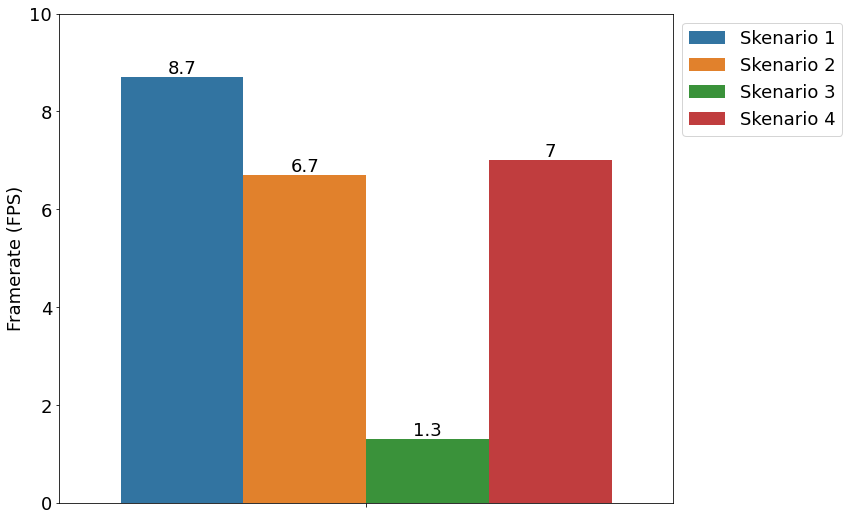

In [72]:
plt.figure(figsize=(11,9))
ax_delay = sns.barplot(data=data_demo_framerate, x='Metrik', y='Framerate (FPS)', hue='Scenario')
ax_delay.set(xticklabels=[])
ax_delay.set(xlabel=None)
# ax_delay.set(title='Perbandingan Metrik Delay (Milliseconds) untuk Keempat Skenario\n(Lebih Rendah Lebih Baik)')
for i in ax_delay.containers:
    ax_delay.bar_label(i,)
ax_delay.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.ylim(0,10)
plt.show()

In [73]:
data_demo_framerate_multi_cam = pd.DataFrame([
    {'Scenario':'Skenario 1', 'Metrik': 'Framerate (FPS)', 'Framerate (FPS)': np.nan},
    {'Scenario':'Skenario 2', 'Metrik': 'Framerate (FPS)', 'Framerate (FPS)': 3.4},
    {'Scenario':'Skenario 3', 'Metrik': 'Framerate (FPS)', 'Framerate (FPS)': 0.7},
    {'Scenario':'Skenario 4', 'Metrik': 'Framerate (FPS)', 'Framerate (FPS)': 1.9},
]).round(2)
data_demo_framerate_multi_cam

,Scenario,Metrik,Framerate (FPS)
0,Skenario 1,Framerate (FPS),NaN
1,Skenario 2,Framerate (FPS),3.4
2,Skenario 3,Framerate (FPS),0.7
3,Skenario 4,Framerate (FPS),1.9


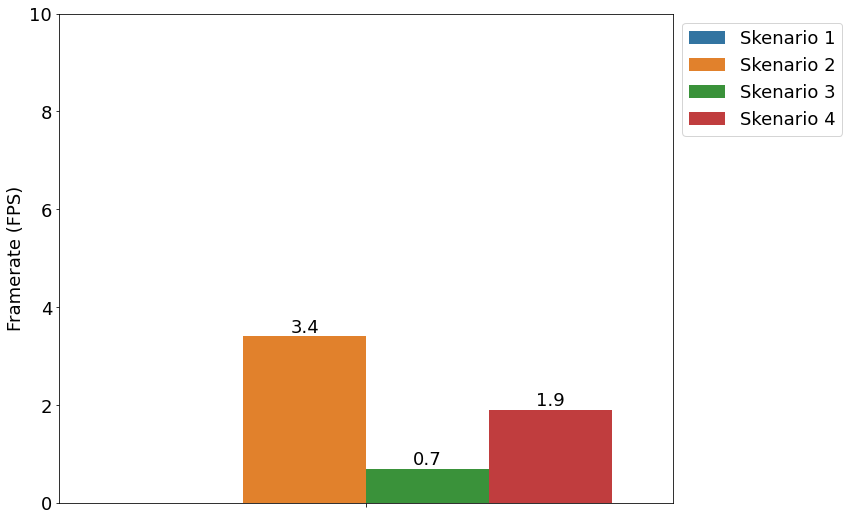

In [74]:
plt.figure(figsize=(11,9))
ax_delay = sns.barplot(data=data_demo_framerate_multi_cam, x='Metrik', y='Framerate (FPS)', hue='Scenario')
ax_delay.set(xticklabels=[])
ax_delay.set(xlabel=None)
# ax_delay.set(title='Perbandingan Metrik Delay (Milliseconds) untuk Keempat Skenario\n(Lebih Rendah Lebih Baik)')
for i in ax_delay.containers:
    ax_delay.bar_label(i,)
ax_delay.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.ylim(0,10)
plt.show()

In [75]:
data_demo_delay = pd.DataFrame([
    {'Scenario':'Skenario 1', 'Metrik': 'Delay (ms)', 'Delay (ms)': 1180},
    {'Scenario':'Skenario 2', 'Metrik': 'Delay (ms)', 'Delay (ms)': 1800},
    {'Scenario':'Skenario 3', 'Metrik': 'Delay (ms)', 'Delay (ms)': 1100},
    {'Scenario':'Skenario 4', 'Metrik': 'Delay (ms)', 'Delay (ms)': 4000},
]).round(2)
data_demo_delay

,Scenario,Metrik,Delay (ms)
0,Skenario 1,Delay (ms),1180
1,Skenario 2,Delay (ms),1800
2,Skenario 3,Delay (ms),1100
3,Skenario 4,Delay (ms),4000


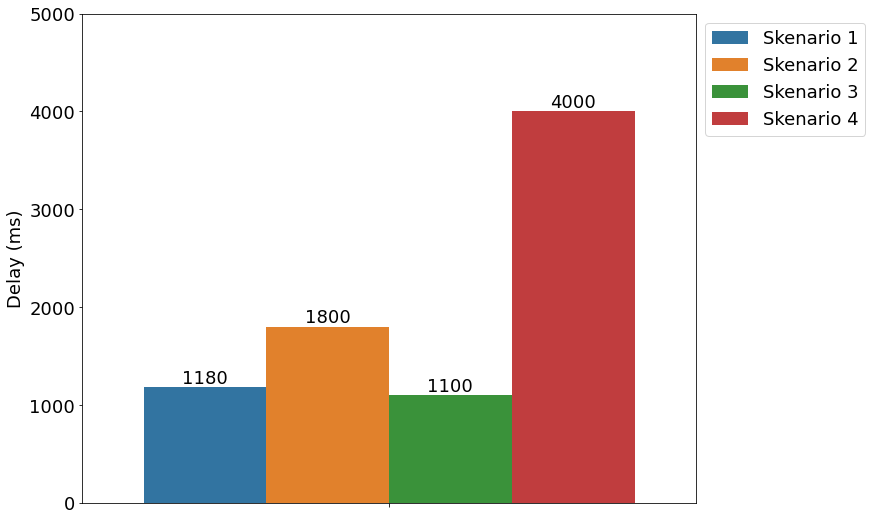

In [76]:
plt.figure(figsize=(11,9))
ax_delay = sns.barplot(data=data_demo_delay, x='Metrik', y='Delay (ms)', hue='Scenario')
ax_delay.set(xticklabels=[])
ax_delay.set(xlabel=None)
# ax_delay.set(title='Perbandingan Metrik Delay (Milliseconds) untuk Keempat Skenario\n(Lebih Rendah Lebih Baik)')
for i in ax_delay.containers:
    ax_delay.bar_label(i,)
ax_delay.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.ylim(0,5000)
plt.show()

In [77]:
data_demo_delay_multi_cam = pd.DataFrame([
    {'Scenario':'Skenario 1', 'Metrik': 'Delay (ms)', 'Delay (ms)': np.nan},
    {'Scenario':'Skenario 2', 'Metrik': 'Delay (ms)', 'Delay (ms)': 1400},
    {'Scenario':'Skenario 3', 'Metrik': 'Delay (ms)', 'Delay (ms)': 3300},
    {'Scenario':'Skenario 4', 'Metrik': 'Delay (ms)', 'Delay (ms)': 5000},
]).round(2)
data_demo_delay_multi_cam

,Scenario,Metrik,Delay (ms)
0,Skenario 1,Delay (ms),NaN
1,Skenario 2,Delay (ms),1400.0
2,Skenario 3,Delay (ms),3300.0
3,Skenario 4,Delay (ms),5000.0


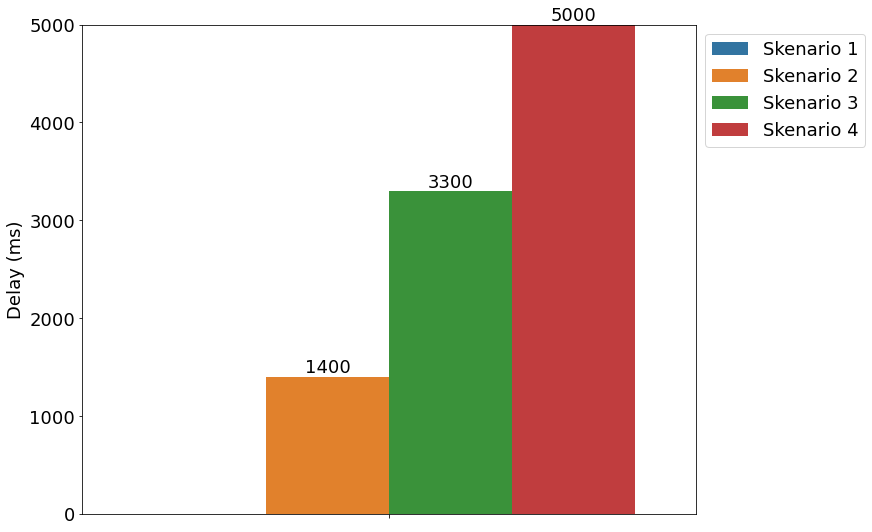

In [78]:
plt.figure(figsize=(11,9))
ax_delay = sns.barplot(data=data_demo_delay_multi_cam, x='Metrik', y='Delay (ms)', hue='Scenario')
ax_delay.set(xticklabels=[])
ax_delay.set(xlabel=None)
# ax_delay.set(title='Perbandingan Metrik Delay (Milliseconds) untuk Keempat Skenario\n(Lebih Rendah Lebih Baik)')
for i in ax_delay.containers:
    ax_delay.bar_label(i,)
ax_delay.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.ylim(0,5000)
plt.show()